# RNN for Time Series Forecasting

Recurrent neural networks (RNN) are a type of neural network that handle sequences, i.e. the relation between observations to each other.

Therefore, RNN seem to be able to learn temporal contexts. In addition, there may be the hope that the explicit relationship (such as trend and seasonalities can be learned by the network without explicitly being programmed. 

## Time Series Forecasting

- Adds the complexity of sequential order (temporal dependence between observations)
- Requires specialized handling of the data (fitting and evaluating)
- Adds additional structure that the model could potentially exploit (i.e. patterns like seasonality and trends)
- Traditional time series analysis focuses on linear methods such as ARIMA models and exponential smoothing

## Neural Networks for Time Series

Neural networks approximate a mapping function from input variables to output variables. 
 
- Robust to noise
- Nonlinear relationship can be captured

## Recurrent Neural Networks for Time Series

- Add explicit handling of order between observations when learning a mapping function from inputs to outputs. 
- Sequence as a new dimension
- LSTM, a special kind of RNN, is able to solve many time series tasks unsolvable by feed-forward networks using fixed size time windows. 
- RNN can learn the temporal dependence from the data. 
- LSTM has the ability to learn long term correlations in a sequence

> Because of this ability to learn long term correlations in a sequence, LSTM networks obviate the need for a pre-specified time window and are capable of accurately modelling complex multivaraite sequences. 

So there is the hope that LSTM may learn complex relationships such as trend and seasonality. In addition, practice and some research suggests removing such systematic structures to simplify the problem space (e.g. Makridakis et al, 2018). 

## Predictions with Sequences

In general, observations in machine learning are treated equally wrt to their order to each other. This is different for sequences. 

- Sequences impose an explicit order on the observations.

### Sequence prediction

Input is an ordered sequence and the task is to predict the next value in the sequence. 

Examples: 

- Weather forecasting, Stock market prediction, Product Recommendation

### Sequence classification

Sequence is given, what is the class label of the sequence?

Examples for classes: 

- Trend/no trend, seasonality/ no seasonality
- Anomaly detection, Sentiment analysis (text is a typical example of sequences that are dealt with in deep learning)

### Sequence Generation

Generating a new output sequence that has the same general characteristics as the input.

Examples: 

- Text generation, Handwriting prediction, Music generation

### Sequence-to-Sequence Prediction

Predicting an output sequence given an input sequence.

Examples: 

- Multi-step Time Series Forecasting
- Text summarization
- Program execution

After clarifying sequences, how can these problems be approached?

# Introduction to Long Short-Term Memory Networks

Long Short-Term Memory (LSTM) networks are a type of recurrent neural network that respect the sequential order of a time series or other data that are ordered in this way.

- Recurrent networks have an internal *state* that can represent context information
- The *state* keeps information about past inputs for an amount of time that is not fixed but depends on its weights and the input data. 
- This network can be used to transform an input sequence into an output sequence

Requirements of a RNN:

- System can store information for an arbitray duration
- System is resistant to noise
- System paramaters can be trained (in reasonable time frame)

Context in RNN: 

- RNN contain cycles that feed the network activations from a previous time step as inputs to the network to influence predictions at the current time step.  
- Activations are stored internally
 - In principle, they can hold long-term temporal contextual information. 
 
### LSTMs

- RNN fail to learn in the presence of time lags greater than 5-10 time steps (vanishing gradient).
- LSTM is not affected by this problem and can learn time lags in excess of 1000 discrete time steps
- This can be achieved by enforcing a constant error or "constant error carrousel" whitin special units (special cells)

Problems the LSTM addresses: 

1. Vanishing gradient
2. Exploding gradients
 
Both are related to the training process of the network.

Key to the success of LSTM is a specific internal structure of the units used in the model

LSTM analogies: 

- Motivation is the error flow of existing RNNs
 - long time lags inaccessible, backpropagated error either blows up or decays exponentially
- LSTM layers has a set of recurrently connected blocks (units which deliver information to themselves)
 - Each LSTM block contains one or more recurrently connected memory cells and three multiplicative units (input, output, forget gate) that provide continous analogues of write, read and reset operations
 - Net can only interact witht the cells via the gates. 
- Promise for any sequential processing task in which we suspect a hierarchical decomposition

### Bidirectional LSTMs

- Process each training sequence forwards and backwards to two separate recurrent nets, both of which are connected to the same output layer

### Seq2seq LSTMs or RNN Encoder-Decoders?

Idea (Ilya Sutskever, 2014):

- Use one LSTM to read the input sequence, one timestep at a time.
- Use another LSTM to extract the output sequence from that vector. 
 - This second LSTM is essentially a RNN language model that is conditioned on the input sequence. 
- Does well on long sentences 


# Introduction to Models for Sequence Prediction with Recurrent Neural Networks

- [link](https://machinelearningmastery.com/models-sequence-prediction-recurrent-neural-networks/)

Recurrent Neural Networks, like LSTM networks are designed to learn the behavior of sequences. 

- LSTMs work by learning a function $f(...)$ that maps input sequence values (X) onto output sequence values. 

> Key idea: In addition to the external vector x, RNNs also have an internal state vector (memory)

This state vector has a fixed (but learned) function to produce a new state vector. State vector and new external input are combined to produce the output and update the state vector. 

## Models for Sequence Prediction

There are 4 primary models for sequence prediction 

Notation: 

- $X(1)$: Input sequence value at 1
- $u(1)$: Hidden state value at time step 1.
- $y(1)$: Output sequence value at time step 1.

Models: 

- **One-to-one** model: Produces one output value for each input value. 
 - Internal state for the first time step is zero
 - In case of a sequence: produce one time step for each observed time step received as input
- **One-to-many** model: multiple output values for one input value
 - image captioning where one image is provided as input and a sequence of words are generated as output. 
- **Many-to-one** model: Produces one output value after receiving multiple input values. 
 - In the case of time series: Model would use a sequence of recent observations to forecast the next time step. This architecture would represent the classical autoregressive time series model. 
- **Many-to-many** model: produces multiple outputs after receiving multiple input values. 
 - Number of input time steps do not have to match the number of output time steps. Intuition -> Input and output time steps operating at different rates
 - In TS forecasting: This model would use a sequence of recent observations to make a multi-step forecast.

The cardinality of the sequence prediction models defined above referst to time steps, not features! I.e. in multivariate cases one-to-one model still means that one feature is mapped to one output for every available feature. 

## Common Misunderstandings

Confusion of features vs time steps leads to two main misunderstandings when implementing recurrent neural networks. 

#### 1. Timesteps as Input Features

- Observations at previous timesteps are framed as input features to the model. 
 - Classical fixed-window approach used by MLP. Sequences are fed into the network at one time even though it should be fed in one time step at a time. 
 
 #### 2. Timesteps as Output Features

Predictions at multiple future time steps are framed as output features to the model. 

- Classical fixed-window approach of making multi-step predictions used by MLP and other ML algorithms. Similar to 1., the sequence predictions should be generaed one time step at a time.
- Framing timesteps in this way may well work but it is important to understand what has actually been implemented.

# On the Suitability of Long Short-Term Memory Networks for Time Series Forecasting

- **LSTM**: RNN that can learn the order dependence between items in a sequence. 
 - Promise of being able to learn context to make predictions in time series forecasitng
 - Some doubt that LSTMs are appropriate for time series forecasting. 

## LSTM for Time Series Forecasting 

Paper: [Applying LSTM to Time Series Predictable through Time-Windoe Approaches](https://link.springer.com/chapter/10.1007/3-540-44668-0_93)

> "Time series benchmark problems found in the literature … are often conceptually simpler than many tasks already solved by LSTM. They often do not require RNNs at all, because all relevant information about the next event is conveyed by a few recent events contained within a small time window."

Two problems: 

- Mackey-Glass Series
- Chaotic Laser Data 

Autoregression approach to model these problems. 

> "The results for the AR-LSTM approach are clearly worse than the results for the time window approaches, for example with MLPs. The AR-LSTM network does not have access to the past as part of its input … [for the LSTM to do well] required remembering one or two events from the past, then using this information before over-writing the same memory cells."

- A time window based MLP outperformed the LSTM pure-AR approach on certain time series prediction benchmarks solvable by looking at a few recent inputs only.
- Thus, LSTM's special strenght, namely, to learn to remember single events for very long, unknown time periods, was not necessary here. 
- LSTM learnred to tune into the fundamental oscillation of each series but was unable to accurately follow the signal.
- LSTM seems to have the ability to learn oscillation behavior (e.g. cycles or seasonality).
- Suggestion: Use LSTM only on tasks where traditinoal time window-based appraoches fail. 
- LSTM's ability to track slow oscillations in the chaotic signal may be applicable to cognitive domains such as rhytmh detection in speech and music.

Based on the paper: 

- LSTMs seem unsuitable for AR-based univariate time series forecasting. 
- Ought turn first to MLPs with a fixed window and only to LSTMs if MLPs cannot achieve good results

Counterarguments (in favor of LSTMs): 

- **More sophisticated data preparation:** Such as least scaling and stationarity.
 - Hypothesis: If a cycle or trend is obvious, then it should be removed so that the model (LSTM) can focus on the underlying signal. 
- **Larger and hierarchical models (stacked LSTMs):** Automatically learn (or "remember") a larger temporal dependence. Larger models may be able to learn more. 
- **More and longer training (no Rocky Balboa):** LSTMs take a long time to learn complex dependencies. Make use of regularization techniques.

# Time Series Forecasting with the LSTM Network in Python

LSTM networks are able to "remember" previous relations, thus modeling the data in their relative order such as a time order. Hence, this sequential model seems to be a good fit for sequence modeling such as time series or speech which also relies on a relational order (arrow to the left or right when it comes to the input). 

This tutorial: 

- Develop a baseline of performance for a forecasting problem
- Design a robust test for one-step time series forecasting
- Prepare data, develop, and evaluate an LSTM recurrent neural network for time series forecasting.

## The Data: Shampoo Sales

- Monthly number of sales of shampoo over a 3-year period (36 observations).
 - Datasource: Makridakis, Wheelwright, and Hyndman (1998)
 - Units are a sales count

In [1]:
# import libs
import pandas as pd
import numpy as np
import matplotlib as plt
import datetime

In [2]:
def parser(x):
    return datetime.datetime.strptime('190'+x, '%Y-%m')

# set "squeeze=True" to return a Series instead of a DataFrame
series = pd.read_csv('../data/shampoo.csv', 
                     parse_dates=[0], 
                     date_parser=parser, 
                     index_col=0, 
                     squeeze=True)

print(series.head())
series.plot(); 

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


#### Transformation of the data

- Various possibilities to transform data to remove components such as trend, seasonality, etc. 
- Removing these components is assumed to simplify the underlying problem. 
- Trend can be removed from the observations, then added back to forecasts later to return the prediction to the original scale and calculate a comparable error score

#### First differences

Here, we use first differences of the data to make them stationary. This can be achieved using the [`diff()` function in pandas](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.diff.html). Alternatively, own function can be used.

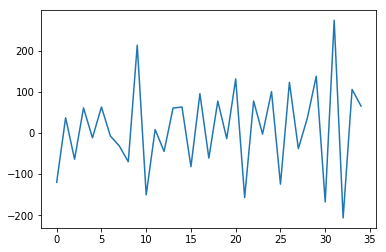

In [22]:
# diff function
def diff_data(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        val = dataset[i] - dataset[i - interval]
        diff.append(val)
    return pd.Series(diff)

raw_values = series.values
diff_series = diff_data(series, 1)
diff_series.plot();

#### Inverse difference process

In order to make forecasts made on the differenced series we need a function that transforms the differenced forecasts back into the original scale. 

In [4]:
# inverse diff function
# ...

#### Transform data to supervised learning problem

In [5]:
def timeseries_to_supervised(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

supervised_df = timeseries_to_supervised(diff_series)
supervised_df.head()

,0,0
0,0.0,-120.1
1,-120.1,37.2
2,37.2,-63.8
3,-63.8,61.0
4,61.0,-11.8


#### Train-test split

In order to test our model on unseen data we split it into a train and test sequence. The model is trained using the `train` data and then evaluated on the `test` data that the model did not *see* during training.

In [6]:
# Split data
train, test = supervised_df.values[0:-12], supervised_df.values[-12:]
print("train:\n",train[:5], "\ntest:\n", test[:5])

train:
 [[   0.  -120.1]
 [-120.1   37.2]
 [  37.2  -63.8]
 [ -63.8   61. ]
 [  61.   -11.8]] 
test:
 [[  77.8   -2.6]
 [  -2.6  100.7]
 [ 100.7 -124.5]
 [-124.5  123.4]
 [ 123.4  -38. ]]


#### Scale the data. 

LSTMs usually require data to be within a certain scale of the activation function used by the network. Default function for LSTMs is the hyperbolic tangent (tanh), yielding outputs in the range of -1 and 1. Scaling coefficients (min and max) values must be calculate on the training dataset and the same scaling will then be applied to the test data and any forecasts. 

- `sklearn.preprocessing.MinMaxScaler(feature_range=(0,1), copy=True)` class will be used to do this ([link](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)).
 - The method: `inverse_transform` can be used to undo the scaling of X according to feature_range.


In [7]:
# Example
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], 
        [-0.5, 6], 
        [0, 10], 
        [1, 18]]

# create object MinMaxScaler class
scaler = MinMaxScaler()
scaler.fit(data)
print(scaler.data_max_)

# apply scaler
print("\n", scaler.transform(data))
print("\n", scaler.transform([[2, 6]]))

[ 1. 18.]

 [[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]

 [[1.5  0.25]]


#### Back to our example:

- Now: Scale to a range of [-1,1]

In [8]:
# instantiate object
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(train)

train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

print("Max of data:\n", scaler.data_max_,"\n\nTrain:\n",train_scaled[:5], "\n\nTest:\n",test_scaled[:5])

Max of data:
 [213.6 213.6] 

Train:
 [[-0.15241435 -0.80037766]
 [-0.80037766  0.04828702]
 [ 0.04828702 -0.496628  ]
 [-0.496628    0.17669274]
 [ 0.17669274 -0.21607769]] 

Test:
 [[ 0.26733207 -0.16644187]
 [-0.16644187  0.39088211]
 [ 0.39088211 -0.82411654]
 [-0.82411654  0.51335312]
 [ 0.51335312 -0.35743189]]


### LSTM Model

- LSTM is a type of RNN
- Can learn and remember over long sequences 
- Does not rely on a pre-specified window lagges observation as input
- Setting `stateful=True`

By default, an LSTM layer in Keras maintains state between data within one batch. State in the LSTM layer between batches is cleared by default, therefore we must make the LSTM stateful. This gives control over when the state of the LSTM layer is cleared, by calling the `reset_states()` function. 

LSTM layer expects input to be in a matrix with the dimensions `[samples, timesteps, features]`

- **Samples:** Independent observations from the domain, typically rows of data.
- **Timesteps:** Separate time steps of a given variable for a given observation. 
- **Features:** These are separate measures observed at the time of the observation. 

In [9]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

Using TensorFlow backend.


In [14]:
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:,-1]
    X = X.reshape(X.shape[0], 1, X.shape[1])

    # Define model
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))

    # compile model
    model.compile(loss='mean_squared_error', optimizer='adam')

    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
        
    return model

In [33]:
lstm_model = fit_lstm(train_scaled, 
                      batch_size=1, 
                      nb_epoch=3000, 
                      neurons=5)

In [34]:
print(lstm_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (1, 5)                    140       
_________________________________________________________________
dense_7 (Dense)              (1, 1)                    6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________
None


## Predict 

In [35]:
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

array([[-0.7998862 ],
       [ 0.0475927 ],
       [-0.5232626 ],
       [ 0.20087588],
       [-0.20868419],
       [ 0.18439704],
       [-0.1495049 ],
       [ 0.0737558 ],
       [ 0.22726512],
       [ 0.4591301 ],
       [-0.96854043],
       [ 0.18104589],
       [-0.11155933],
       [ 0.19077533],
       [-0.25307292],
       [-0.40478685],
       [ 0.2718264 ],
       [-0.47632688],
       [ 0.15356731],
       [-0.3955942 ],
       [-0.06103447],
       [-0.8963068 ],
       [ 0.16121745]], dtype=float32)

In [36]:
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))  # len(X): n_feature
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

predictions = list()

for i in range(len(test_scaled)):
    
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)
    
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    
    # store forecast
    predictions.append(yhat)
    expected = raw_values[len(train) + i + 1]
    print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

Month=1, Predicted=280.111666, Expected=339.700000
Month=2, Predicted=338.595780, Expected=440.400000
Month=3, Predicted=313.432051, Expected=315.900000
Month=4, Predicted=374.297264, Expected=439.300000
Month=5, Predicted=294.525069, Expected=401.300000
Month=6, Predicted=379.147303, Expected=437.400000
Month=7, Predicted=393.124894, Expected=575.500000
Month=8, Predicted=335.421408, Expected=407.600000
Month=9, Predicted=428.613003, Expected=682.000000
Month=10, Predicted=428.492815, Expected=475.300000
Month=11, Predicted=496.305816, Expected=581.300000
Month=12, Predicted=395.573499, Expected=646.900000


## Evaluate

In [37]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse=sqrt(mean_squared_error(raw_values[-12:], predictions))
print("Test RMSE: {:.3f}".format(rmse))

Test RMSE: 131.718


## Plot

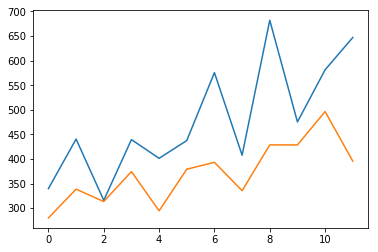

In [39]:
from matplotlib import pyplot

pyplot.plot(raw_values[-12:])
pyplot.plot(predictions)